# SIGNAL PROCESSING TP6 - M2 AI
## To Do: image denoising in wavelet domain

- Benedictus Kent Rachmat
- Jacobo Ruiz Ocampo

---

## IMPORT

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pywt
import tqdm

from nt_toolbox.general import *
from nt_toolbox.signal import *

In [5]:
original_image = cv2.imread('barbara.jpg', cv2.IMREAD_GRAYSCALE)
original_image = (original_image - original_image.min()) / (original_image.max() - original_image.min())

np.random.seed(42)

SNR_LEVELS = [0, 10, 20]

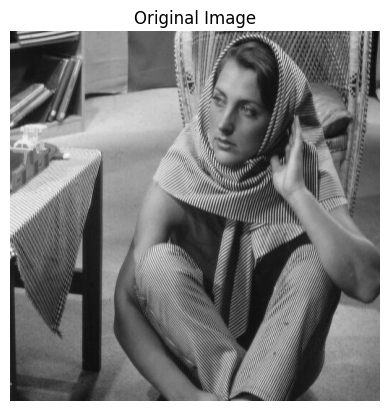

In [6]:
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

In [9]:
def add_noise(signal, snr_db):
    # Compute the variance of the noise
    signal_variance = np.var(signal)
    calculated_noise_variance = signal_variance / np.power(10, snr_db / 10)
    calculated_noise_std = np.sqrt(calculated_noise_variance)
    
    # Introduce noise to the original image
    generated_noise = np.random.normal(0, calculated_noise_std, signal.shape)
    distorted_signal = signal + generated_noise
    
    return distorted_signal

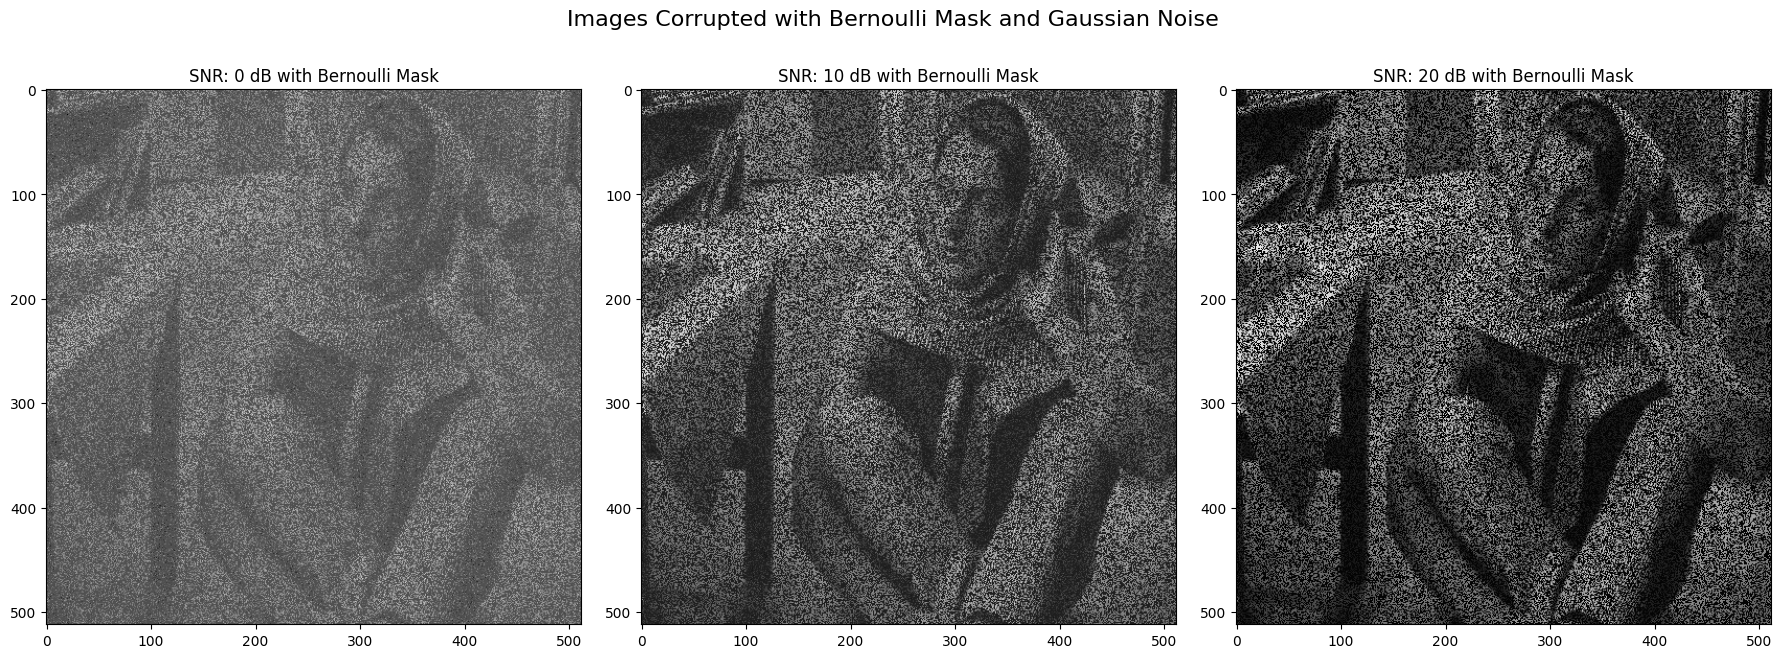

In [10]:
def apply_bernoulli_mask(image, p):
    """Apply a Bernoulli mask to the image."""
    mask = np.random.binomial(1, p, image.shape)
    return image * mask

# Corrupt the original image using Bernoulli mask
corrupted_images_bernoulli = {}

for snr in SNR_LEVELS:
    noisy_img = add_noise(original_image, SNR)
    corrupted_img = apply_bernoulli_mask(noisy_img, 0.5)
    corrupted_images_bernoulli[SNR] = corrupted_img

# Plot the corrupted images
fig, axes = plt.subplots(1, len(SNR_LEVELS), figsize=(18, 6))

for index, SNR in enumerate(SNR_LEVELS):
    axes[index].imshow(corrupted_images_bernoulli[SNR], cmap='gray')
    axes[index].set_title(f"SNR: {SNR} dB with Bernoulli Mask")

fig.suptitle("Images Corrupted with Bernoulli Mask and Gaussian Noise", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


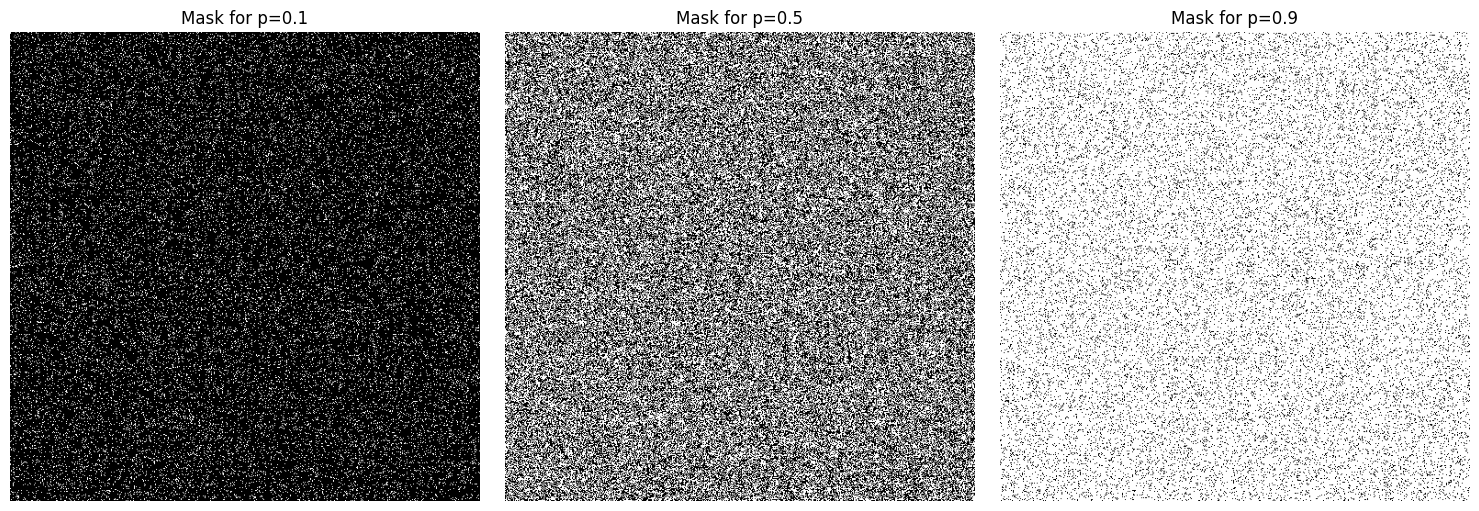